# Is Aristotle's Natural Philosophy objective?

## Introduction
The scientific method is well known to be one of mankind's greatest creation. It allowed us to make observations about the world around us and discern what is fact and what is fiction. Before science, there was natural philosophy.

natural philosophy is
as a predecessor to the scientific method, we assume a level of objectivity higher than other schools of philosophy
objectivity is defined as

Here we will take Aristotle's work, try to classify it's topics (identify natural philosophy vs not) and determine the overall level of objectivity to try and single it out from other philosohical

In [1]:
#Operations
import pandas as pd
import numpy as np
import sys

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#NLP Cleaning
import spacy
from spacy.lang.en import English
import en_core_web_md
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#NLP Algorithms
import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from textblob import TextBlob

In [2]:
df = pd.read_csv('/Users/safiraraharjo/Documents/GitHub/ads-spring2023-project1-safiraharjo/data/philosophy_data.csv')
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

NLP cleaning

In [3]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(df['sentence_str']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)
    
df['cleaned'] = tokens

We are only using aristotle, so filter

In [4]:
aristotle = df[df.author == 'Aristotle']

In [ ]:
#%run <name of script.py>

# Import the wordcloud library

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
# Create Dictionary
id2word = corpora.Dictionary(aristotle['cleaned'])

id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [id2word.doc2bow(doc) for doc in aristotle['cleaned']]
#https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.filter_extremes.html

In [ ]:
%run '/Users/safiraraharjo/Documents/GitHub/ads-spring2023-project1-safiraharjo/lib/coherence.py' 'u_mass' 'corpus' 'id2word' aristotle['cleaned']

In [7]:
topics = []
score = []
for i in range(2,20,1):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=aristotle['cleaned'], dictionary=id2word, coherence='u_mass')
    topics.append(i)
    score.append(coherence_model_lda.get_coherence())
    
#https://www.baeldung.com/cs/topic-modeling-coherence-score

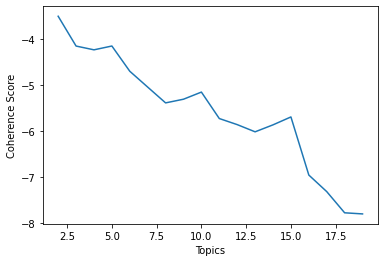

In [8]:
plt.figure()
plt.plot(topics, score)
plt.xlabel('Topics')
plt.ylabel('Coherence Score')
plt.show()

In [34]:
topics = []
score = []
for i in range(2,3,1):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=aristotle['cleaned'], dictionary=id2word, coherence='c_v')
    topics.append(i)
    score.append(coherence_model_lda.get_coherence())
    
#https://www.baeldung.com/cs/topic-modeling-coherence-score

Process SpawnPoolWorker-62:
Process SpawnPoolWorker-64:
Process SpawnPoolWorker-63:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 109, in worker
    initializer(*initargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/gensim/models/ldamulticore.py", line 346, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/opt/anaconda3/lib/python3.9/site-packages/gensim/models/ldamodel.py", line 767, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/opt/anaconda3/lib/python3.9/site-packages/gensim/models/ldamodel.py", line 721, in inference
    phinorm = np.dot(expElogthetad, expElogbetad) + epsilon
  File "<__array_function__ internals>", lin

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(topics, score)
plt.xlabel('Topics')
plt.ylabel('Coherence Score')
plt.show()

In [9]:
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"man" + 0.021*"good" + 0.016*"way" + 0.014*"say" + 0.012*"thing" + '
  '0.012*"form" + 0.010*"law" + 0.009*"part" + 0.008*"pleasure" + '
  '0.008*"excellence"'),
 (1,
  '0.044*"thing" + 0.020*"case" + 0.014*"kind" + 0.013*"poet" + 0.010*"matter" '
  '+ 0.010*"animal" + 0.009*"point" + 0.009*"time" + 0.009*"man" + '
  '0.009*"form"'),
 (2,
  '0.022*"tragedy" + 0.020*"state" + 0.012*"live" + 0.011*"belong" + '
  '0.010*"mean" + 0.009*"number" + 0.009*"thing" + 0.009*"think" + '
  '0.009*"word" + 0.008*"cold"'),
 (3,
  '0.021*"good" + 0.018*"come" + 0.017*"nature" + 0.016*"thing" + 0.015*"time" '
  '+ 0.014*"water" + 0.013*"act" + 0.012*"object" + 0.011*"reason" + '
  '0.010*"case"'),
 (4,
  '0.022*"animal" + 0.018*"great" + 0.013*"movement" + 0.013*"life" + '
  '0.013*"body" + 0.012*"thing" + 0.012*"character" + 0.010*"produce" + '
  '0.009*"small" + 0.009*"man"')]


In [10]:
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)
topic_id_list = all_topics_df.idxmax(axis=1)

In [11]:
aristotle['topics'] = topic_id_list

/var/folders/p0/64bf77rj6sxbwv0p9jxt77pw0000gn/T/ipykernel_40362/1330383175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aristotle['topics'] = topic_id_list


In [12]:
aristotle['cleaned_str'] = [','.join(map(str, l)) for l in aristotle['cleaned']]
topic_wordcloud = aristotle.groupby('topics')['cleaned_str'].apply(list)
topic_wordcloud[:] = [', '.join(map(str, l)) for l in topic_wordcloud[:]]
topic_wordcloud_df=pd.DataFrame(topic_wordcloud)
topic_wordcloud_df['cleaned_str'] = topic_wordcloud_df['cleaned_str'].str.replace("thing,", "")
topic_wordcloud_df

/var/folders/p0/64bf77rj6sxbwv0p9jxt77pw0000gn/T/ipykernel_40362/647333040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aristotle['cleaned_str'] = [','.join(map(str, l)) for l in aristotle['cleaned']]


cleaned_str
topics                                                   
0.0     common,definition,correspond,different,call,ho...
1.0     common,definition,correspond,call,synonymous, ...
2.0     example,involve,combination,man,run,man,win,co...
3.0     example,knowledge,subject,soul,say,subject,kno...
4.0     difference,ending,call,paronymous, say,primary...

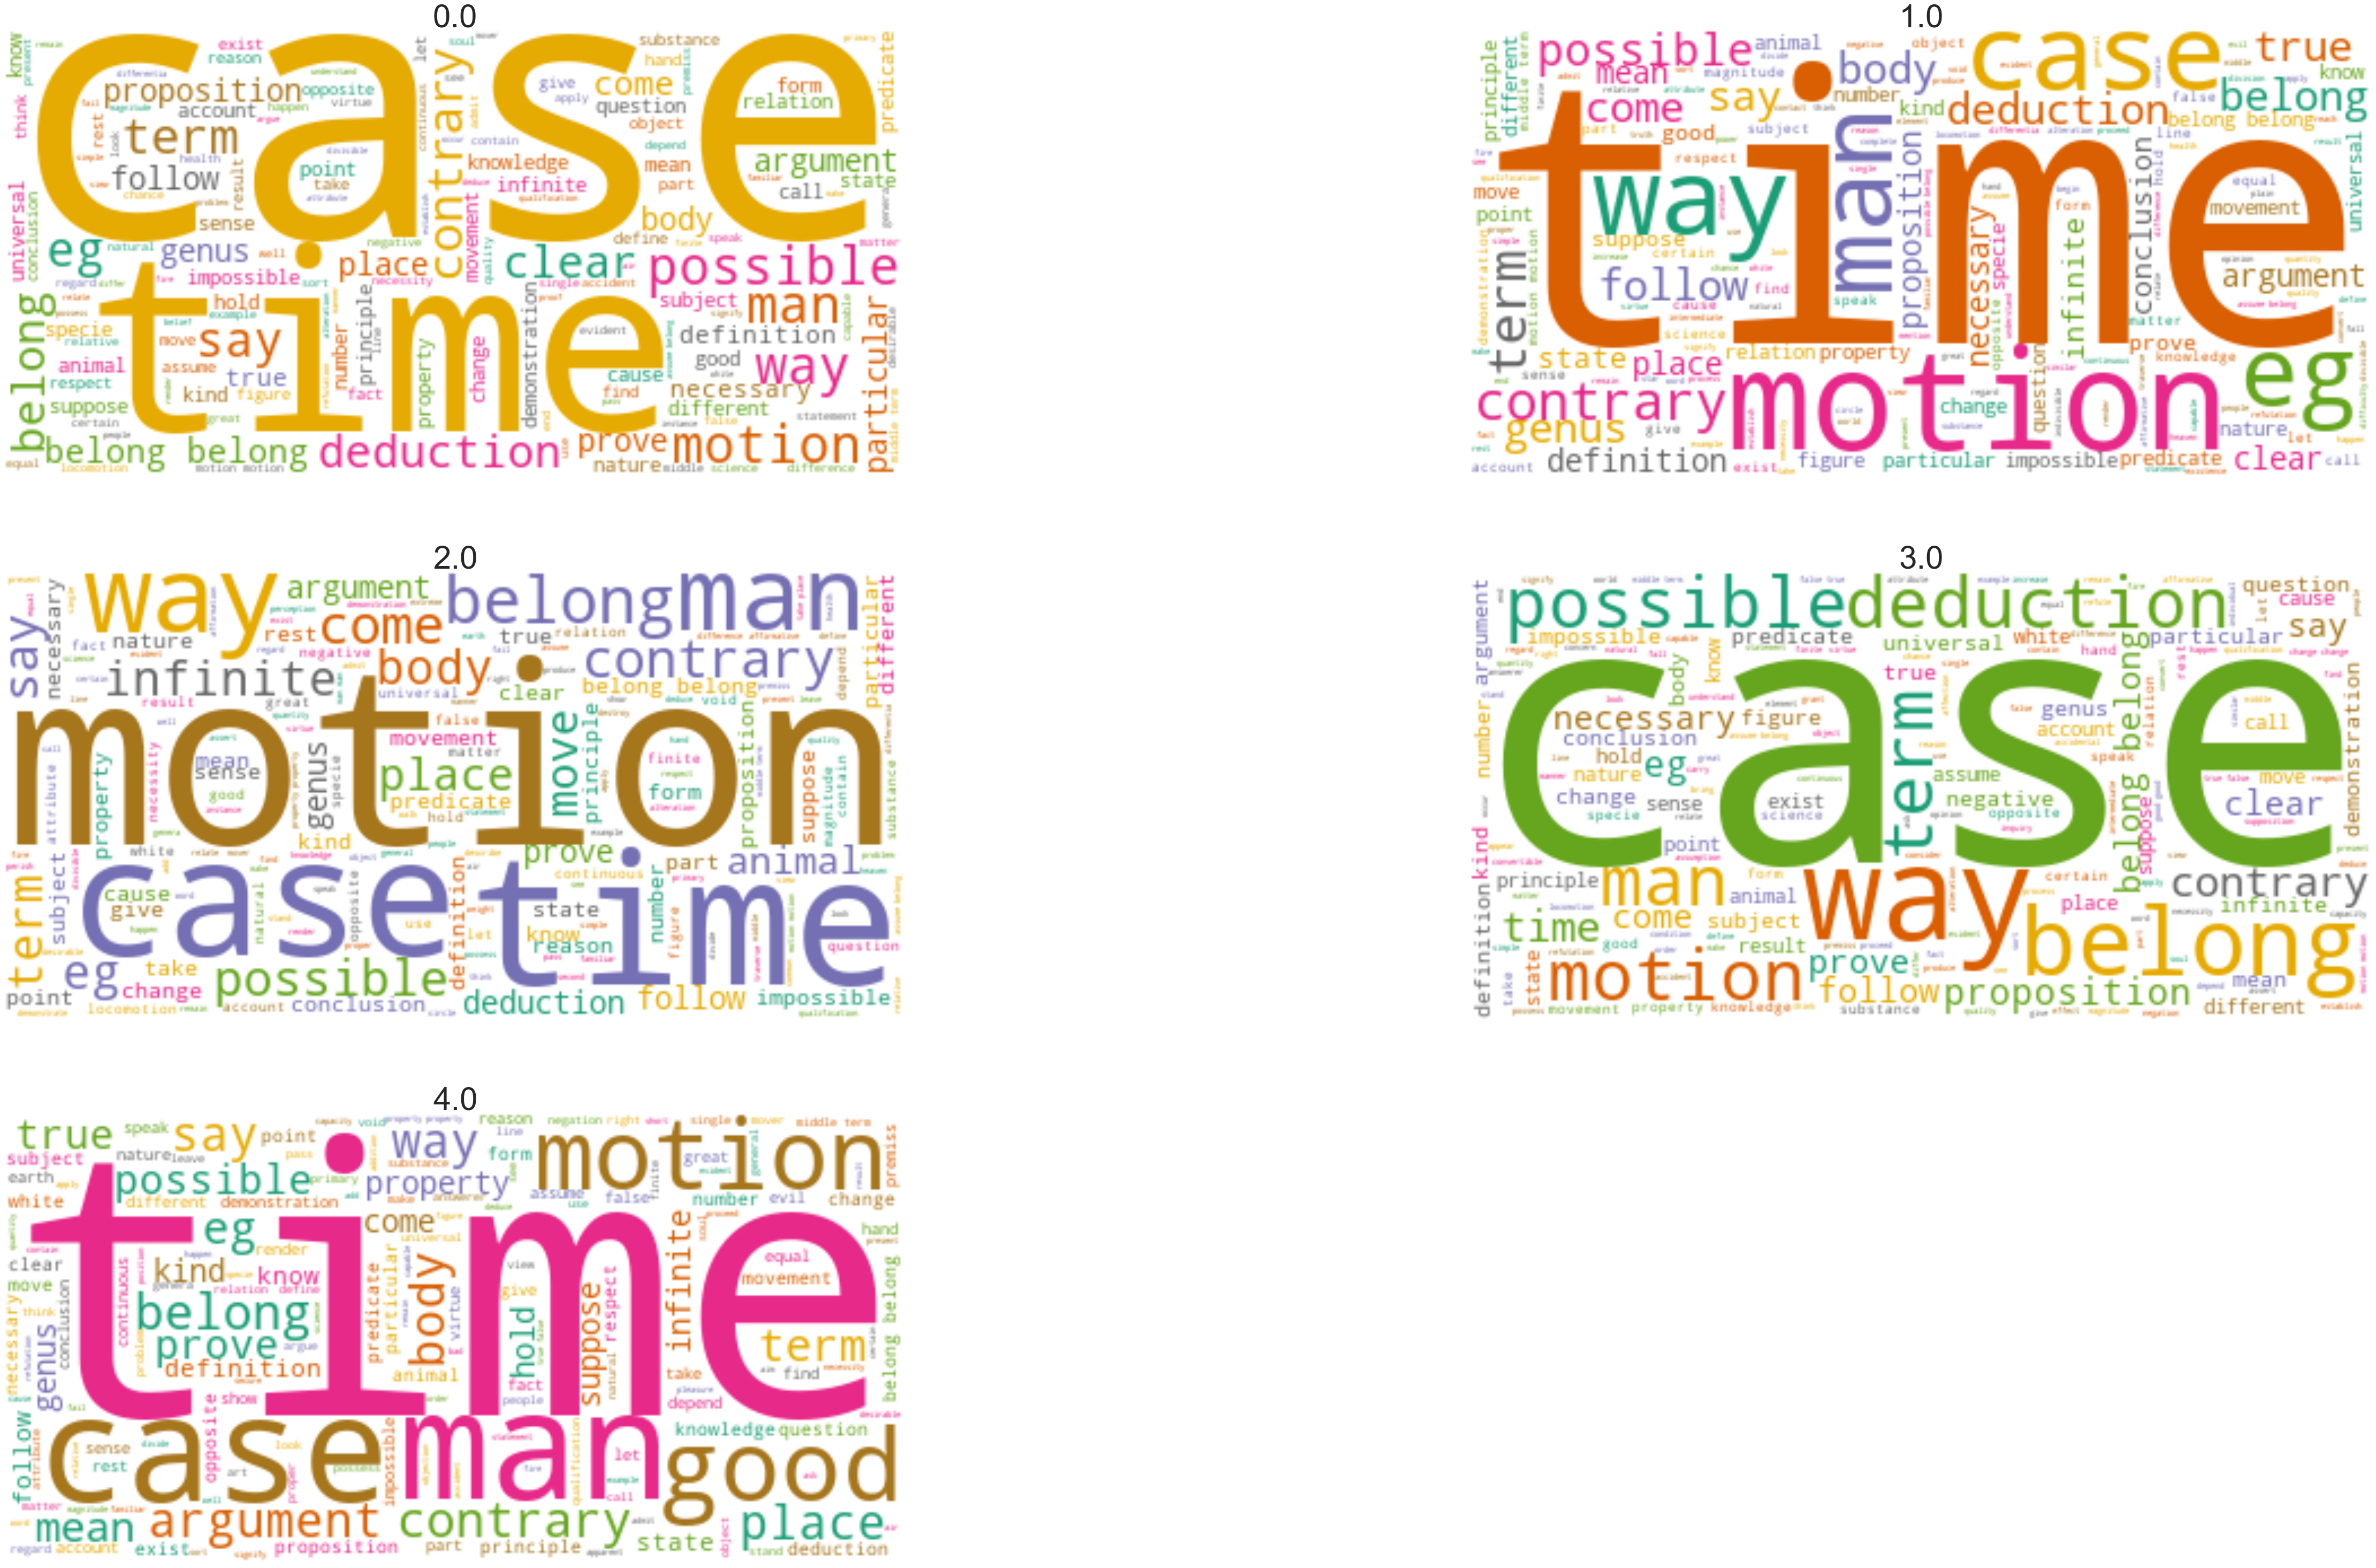

In [13]:
sns.set()
plt.rcParams['figure.figsize'] = [90, 90]

x, y = np.ogrid[:300, :300]

wordcloud = WordCloud(background_color="white", contour_width=0.1, 
                      contour_color="black",  max_font_size=200, random_state=42,
                      colormap="Dark2")

for i in range(5):
    wordcloud.generate(text=topic_wordcloud_df['cleaned_str'][i])   
    plt.subplot(5, 2, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(topic_wordcloud_df.index[i], fontdict={'fontsize': 60})
plt.show()

In [26]:
pyLDAvis.enable_notebook()
gensimvis.prepare(lda_model, corpus, id2word)

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.013173  0.001032       1        1  21.701800
4     -0.141937  0.047043       2        1  21.684445
0      0.048512 -0.032423       3        1  20.564134
3     -0.005690 -0.104564       4        1  20.147990
2      0.085943  0.088912       5        1  15.901630, topic_info=        Term         Freq        Total Category  logprob  loglift
8        man  5561.000000  5561.000000  Default  30.0000  30.0000
926  tragedy  1214.000000  1214.000000  Default  29.0000  29.0000
420     poet  1034.000000  1034.000000  Default  28.0000  28.0000
114     good  3741.000000  3741.000000  Default  27.0000  27.0000
192    state  2220.000000  2220.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
417    shall   348.094232  1317.618380   Topic5  -5.0690   0.5076
5      thing   520.812913  6785.267249   Topic5  -4.6661  -0.7284
15       say   391.361133  2473.495673   Topic5  -4.9518  -0.0050
534      art   327.528083  1105.413310   Topic5  -5.1299   0.6223
8        man   318.112060  5561.986373   Topic5  -5.1591  -1.0226

[339 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
939       1  0.029586  abundance
939       2  0.103553  abundance
939       3  0.029586  abundance
939       4  0.784041  abundance
939       5  0.044380  abundance
...     ...       ...        ...
775       1  0.010319      young
775       2  0.716459      young
775       3  0.103194      young
775       4  0.070761      young
775       5  0.098771      young

[1164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

In [38]:
subj = []
#list to string

for i in range(len(aristotle)):
    item = TextBlob(aristotle.iloc[i, 10]).subjectivity
    subj.append(item)
    
aristotle['subjectivity'] = subj

aristotle.head()

/var/folders/p0/64bf77rj6sxbwv0p9jxt77pw0000gn/T/ipykernel_40362/1993503205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aristotle['subjectivity'] = subj


title     author     school  \
38366  Aristotle - Complete Works  Aristotle  aristotle   
38367  Aristotle - Complete Works  Aristotle  aristotle   
38368  Aristotle - Complete Works  Aristotle  aristotle   
38369  Aristotle - Complete Works  Aristotle  aristotle   
38370  Aristotle - Complete Works  Aristotle  aristotle   

                                          sentence_spacy  \
38366   When things have only a name in common and th...   
38367  Thus, for example, both a man and a picture ar...   
38368  These have only a name in common and the defin...   
38369  When things have the name in common and the de...   
38370  Thus, for example, both a man and an ox are an...   

                                            sentence_str  \
38366   When things have only a name in common and th...   
38367  Thus, for example, both a man and a picture ar...   
38368  These have only a name in common and the defin...   
38369  When things have the name in common and the de...   
38370  Thus, for example, both a man and an ox are an...   

       original_publication_date  corpus_edition_date  sentence_length  \
38366                       -320                 1991              139   
38367                       -320                 1991               56   
38368                       -320                 1991              207   
38369                       -320                 1991              134   
38370                       -320                 1991               52   

                                        sentence_lowered  \
38366   when things have only a name in common and th...   
38367  thus, for example, both a man and a picture ar...   
38368  these have only a name in common and the defin...   
38369  when things have the name in common and the de...   
38370  thus, for example, both a man and an ox are an...   

                                           tokenized_txt  \
38366  ['when', 'things', 'have', 'only', 'name', 'in...   
38367  ['thus', 'for', 'example', 'both', 'man', 'and...   
38368  ['these', 'have', 'only', 'name', 'in', 'commo...   
38369  ['when', 'things', 'have', 'the', 'name', 'in'...   
38370  ['thus', 'for', 'example', 'both', 'man', 'and...   

                                          lemmatized_str  \
38366     when thing have only a name in common and t...   
38367   thus , for example , both a man and a picture...   
38368   these have only a name in common and the defi...   
38369   when thing have the name in common and the de...   
38370   thus , for example , both a man and an ox be ...   

                                                 cleaned  topics  \
38366  [thing, common, definition, correspond, differ...     0.0   
38367                    [example, man, picture, animal]     0.0   
38368  [common, definition, correspond, different, an...     0.0   
38369  [thing, common, definition, correspond, call, ...     1.0   
38370                         [example, man, ox, animal]     0.0   

                                             cleaned_str  subjectivity  
38366  thing,common,definition,correspond,different,c...        0.7000  
38367                         example,man,picture,animal        0.0000  
38368  common,definition,correspond,different,animal,...        0.6000  
38369  thing,common,definition,correspond,call,synony...        0.3125  
38370                              example,man,ox,animal        0.0000

In [44]:
aristotle.groupby(['topics'])['subjectivity'].mean()

topics
0.0    0.374635
1.0    0.360289
2.0    0.365670
3.0    0.373644
4.0    0.378645
Name: subjectivity, dtype: float64

In [40]:
subj = []
#list to string

for i in range(len(df)):
    item = TextBlob(df.iloc[i, 10]).subjectivity
    subj.append(item)
    
df['subjectivity'] = subj

In [47]:
df.groupby('school').agg({'subjectivity': ['mean']})

subjectivity
                        mean
school                      
analytic            0.357907
aristotle           0.391550
capitalism          0.416716
communism           0.353893
continental         0.382451
empiricism          0.408664
feminism            0.416019
german_idealism     0.401641
nietzsche           0.390775
phenomenology       0.361847
plato               0.381894
rationalism         0.436528
stoicism            0.397626

In [42]:
df.groupby(['school'])['subjectivity'].mean()

school
analytic           0.357907
aristotle          0.391550
capitalism         0.416716
communism          0.353893
continental        0.382451
empiricism         0.408664
feminism           0.416019
german_idealism    0.401641
nietzsche          0.390775
phenomenology      0.361847
plato              0.381894
rationalism        0.436528
stoicism           0.397626
Name: subjectivity, dtype: float64

In [48]:
abstracts = pd.read_csv('/Users/safiraraharjo/Documents/GitHub/ads-spring2023-project1-safiraharjo/data/covid_abstracts.csv')
abstracts.head()

title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   

                                        url  
0  https://pubmed.ncbi.nlm.nih.gov/35008137  
1  https://pubmed.ncbi.nlm.nih.gov/35008104  
2  https://pubmed.ncbi.nlm.nih.gov/35007996  
3  https://pubmed.ncbi.nlm.nih.gov/35007991  
4  https://pubmed.ncbi.nlm.nih.gov/35007959

In [50]:
subj = []
#list to string

for i in range(len(abstracts)):
    item = TextBlob(abstracts.iloc[i, 1]).subjectivity
    subj.append(item)
    
abstracts['subjectivity'] = subj
abstracts['subjectivity'].mean()

0.4294875300496997

In [51]:
abstracts.head()

title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   

                                        url  subjectivity  
0  https://pubmed.ncbi.nlm.nih.gov/35008137      0.322825  
1  https://pubmed.ncbi.nlm.nih.gov/35008104      0.532528  
2  https://pubmed.ncbi.nlm.nih.gov/35007996      0.352798  
3  https://pubmed.ncbi.nlm.nih.gov/35007991      0.307353  
4  https://pubmed.ncbi.nlm.nih.gov/35007959      0.396753

A sentence like 'The impact of the coronavirus disease 2019 (COVID-19) pandemic on well-being has the potential for serious negative consequences on work, home life, and patient care.' found in one of the abstracts, is actually a subjective sentence.

In [ ]:
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(abstracts['abstract']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)
    
abstracts['cleaned'] = tokens

In [ ]:
https://levelup.gitconnected.com/simple-nlp-in-python-2cb3243239d3